In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common imports
import os
import numpy as np
import xarray as xr

import xskillscore as xs        # calculating skill scores
#import xesmf as xe              # regridding
%matplotlib inline

import cartopy
import cartopy as ccrs

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rcParams["figure.figsize"] = (16,8)
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
path='/media/sshudhees/DAEA17D6EA17ADAF/Data/Data_Aaditya/jupyter'
nc_igpp=xr.open_dataset(path+'/amphan/igpp_ERA5_amph_2020.nc')

nc_icig=xr.open_dataset(path+'/amphan/igpp_imd_2020_0513_ens.nc')
nc_ickg=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_ens.nc')
ic1_ensemble1=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_01.nc')
ic1_ensemble2=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_02.nc')
ic1_ensemble3=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_03.nc')
ic1_ensemble4=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_04.nc')
ic1_ensemble5=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_05.nc')
ic1_ensemble6=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_06.nc')
ic1_ensemble7=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_07.nc')
ic1_ensemble8=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_08.nc')
ic1_ensemble9=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_09.nc')
ic1_ensemble10=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_10.nc')
ic1_ensemble11=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_11.nc')
ic1_ensemble12=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_12.nc')
ic1_ensemble13=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_13.nc')
ic1_ensemble14=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_14.nc')
ic1_ensemble15=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_15.nc')
ic1_ensemble16=xr.open_dataset(path+'/amphan/igpp_index_2020_0513_16.nc')

/home/sshudhees/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [117]:
nc_igpp

<xarray.Dataset>
Dimensions:  (time: 10, lon: 70, lat: 29)
Coordinates:
  * time     (time) datetime64[ns] 2020-05-12 2020-05-13 ... 2020-05-21
  * lon      (lon) float64 40.0 41.0 42.0 43.0 44.0 ... 106.0 107.0 108.0 109.0
  * lat      (lat) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 25.0 26.0 27.0 28.0 29.0
Data variables:
    gpi      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Mon May 16 16:14:33 2022: cdo -f nc import_binary igpp_ERA5...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [49]:

nc_kgpp=xr.open_dataset(path+'/amphan/kot_ERA5_amphan_2020.nc')

ic1_kensemble1=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_00.nc')
ic1_kensemble2=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_01.nc')
ic1_kensemble3=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_02.nc')
ic1_kensemble4=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_03.nc')
ic1_kensemble5=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_04.nc')
ic1_kensemble6=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_05.nc')
ic1_kensemble7=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_06.nc')
ic1_kensemble8=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_07.nc')
ic1_kensemble9=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_08.nc')
ic1_kensemble10=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_09.nc')
ic1_kensemble11=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_10.nc')
ic1_kensemble12=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_11.nc')
ic1_kensemble13=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_12.nc')
ic1_kensemble14=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_13.nc')
ic1_kensemble15=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_14.nc')
ic1_kensemble16=xr.open_dataset(path+'/amphan/kotal_index_2020_0513_15.nc')


/home/sshudhees/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [5]:
nc_kgpp=xr.open_dataset(path+'/amphan/kot_ERA5_amphn_2020.nc')
nc_kgpp

<xarray.Dataset>
Dimensions:  (time: 10, lon: 70, lat: 29)
Coordinates:
  * time     (time) datetime64[ns] 2020-05-12 2020-05-13 ... 2020-05-21
  * lon      (lon) float64 40.0 41.0 42.0 43.0 44.0 ... 106.0 107.0 108.0 109.0
  * lat      (lat) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 25.0 26.0 27.0 28.0 29.0
Data variables:
    gpi      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Mon May 16 17:02:24 2022: cdo -f nc import_binary kot_ERA5_...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [6]:
ic2_ensemble1=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_01.nc')
ic2_ensemble2=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_02.nc')
ic2_ensemble3=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_03.nc')
ic2_ensemble4=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_04.nc')
ic2_ensemble5=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_05.nc')
ic2_ensemble6=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_06.nc')
ic2_ensemble7=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_07.nc')
ic2_ensemble8=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_08.nc')
ic2_ensemble9=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_09.nc')
ic2_ensemble10=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_10.nc')
ic2_ensemble11=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_11.nc')
ic2_ensemble12=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_12.nc')
ic2_ensemble13=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_13.nc')
ic2_ensemble14=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_14.nc')
ic2_ensemble15=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_15.nc')
ic2_ensemble16=xr.open_dataset(path+'/amphan/igpp_index_2020_0506_16.nc')

In [79]:
ic2_kensemble1=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_00.nc')
ic2_kensemble2=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_01.nc')
ic2_kensemble3=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_02.nc')
ic2_kensemble4=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_03.nc')
ic2_kensemble5=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_04.nc')
ic2_kensemble6=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_05.nc')
ic2_kensemble7=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_06.nc')
ic2_kensemble8=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_07.nc')
ic2_kensemble9=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_08.nc')
ic2_kensemble10=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_09.nc')
ic2_kensemble11=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_10.nc')
ic2_kensemble12=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_11.nc')
ic2_kensemble13=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_12.nc')
ic2_kensemble14=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_13.nc')
ic2_kensemble15=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_14.nc')
ic2_kensemble16=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_15.nc')

/home/sshudhees/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [80]:
nc_ic2ig=xr.open_dataset(path+'/amphan/igpp_imd_2020_0506_ens.nc')
nc_ic2kg=xr.open_dataset(path+'/amphan/kotal_index_2020_0506_ens.nc')

In [33]:
ic1_kensemble1

<xarray.Dataset>
Dimensions:  (time: 32, lon: 360, lat: 181)
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 2020-05-15 ... 2020-06-14
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    kot      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sun May 15 00:10:35 2022: cdo -f nc import_binary kotal_ind...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

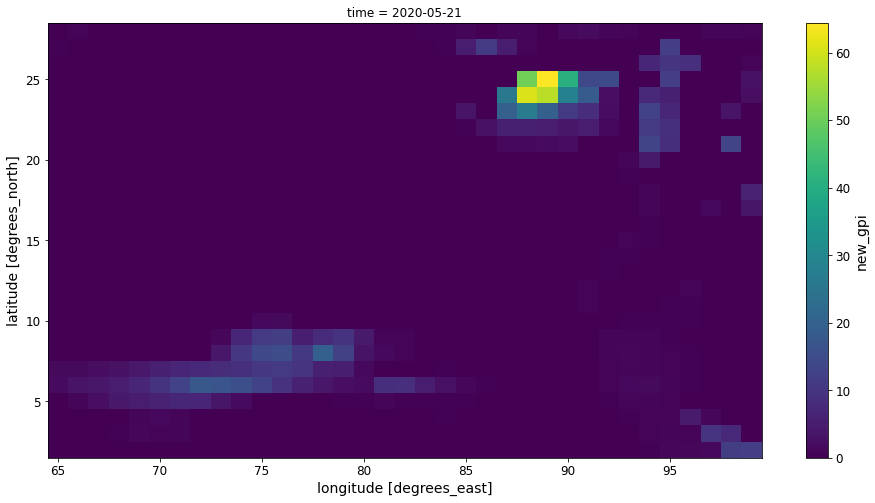

In [121]:
nc_igpp.gpi[9,1:28,25:60].plot()

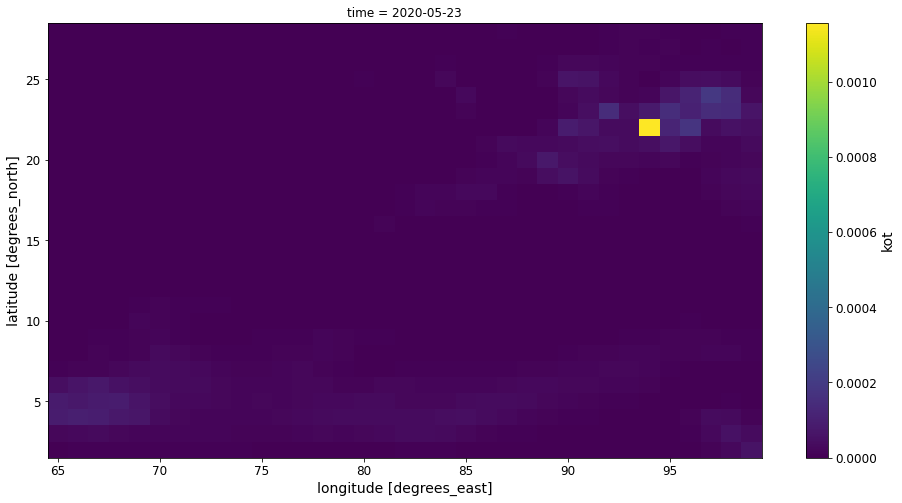

In [11]:
nc_ickg.kot[9,92:119,65:100].plot()

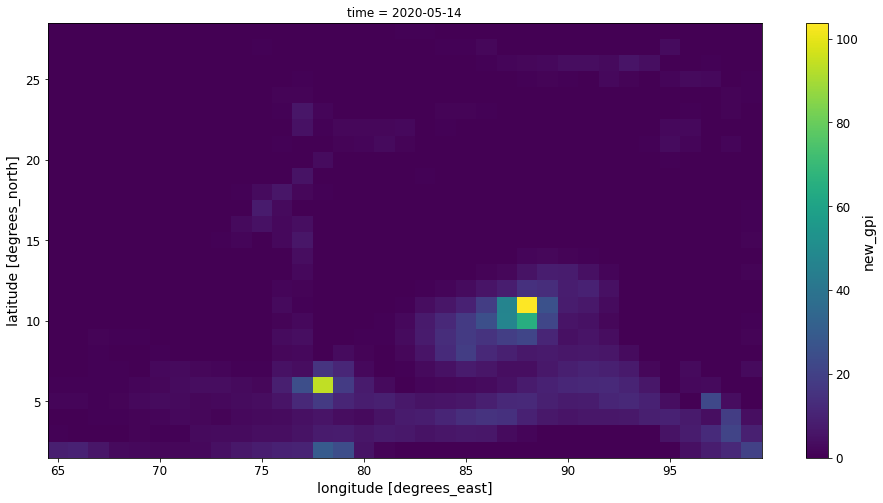

In [15]:
tc_kgpp[0,:,:].plot()

In [13]:
tc_igpp=nc_igpp.gpi[2:10,1:28,25:60]
tc_kgpp=nc_kgpp.gpi[2:10,1:28,25:60]

In [25]:
igpp_ic1ens=nc_icig.gpp[0:8,92:119,65:100]
kgpp_ic1ens=nc_ickg.kot[0:8,92:119,65:100]*100000

In [26]:
igpp_ic2ens=nc_ic2ig.gpp[7:15,92:119,65:100]
kgpp_ic2ens=nc_ic2kg.kot[7:15,92:119,65:100]*100000

In [139]:
igpp_ic2ens

<xarray.DataArray 'gpp' (time: 8, lat: 27, lon: 35)>
array([[[1.763100e+00, 2.147212e+00, ..., 5.324844e+00, 1.032016e+01],
        [2.214320e+00, 3.510975e+00, ..., 8.050737e+00, 6.797629e+00],
        ...,
        [1.705103e-01, 2.227342e-01, ..., 2.915713e-01, 3.577085e-02],
        [2.003314e-01, 1.794199e-01, ..., 9.620944e-02, 7.032489e-02]],

       [[5.232691e-01, 7.127423e-01, ..., 4.681929e+00, 1.130630e+01],
        [5.951147e-01, 8.636856e-01, ..., 8.144905e+00, 7.396834e+00],
        ...,
        [1.163938e-01, 1.966084e-01, ..., 1.764628e-01, 1.192187e-02],
        [5.047341e-02, 4.213642e-02, ..., 8.240256e-02, 3.602747e-01]],

       ...,

       [[7.511088e-03, 3.480892e-02, ..., 1.753487e+00, 3.130051e+00],
        [1.313183e-02, 2.519893e-02, ..., 2.602579e+00, 2.945432e+00],
        ...,
        [2.377929e-01, 1.585526e-01, ..., 1.249103e+00, 2.724316e-01],
        [2.800201e-01, 3.043392e-01, ..., 5.203681e-01, 7.518677e-01]],

       [[1.396188e-01, 8.055705e-02, ..., 1.183851e+00, 2.695896e+00],
        [1.706030e-01, 7.936586e-02, ..., 1.999333e+00, 2.861212e+00],
        ...,
        [5.523520e-03, 5.307110e-02, ..., 1.464337e+00, 4.379112e-01],
        [0.000000e+00, 0.000000e+00, ..., 6.842778e-01, 9.217548e-01]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 2020-05-15 ... 2020-05-21
  * lon      (lon) float64 65.0 66.0 67.0 68.0 69.0 ... 95.0 96.0 97.0 98.0 99.0
  * lat      (lat) float64 2.0 3.0 4.0 5.0 6.0 7.0 ... 24.0 25.0 26.0 27.0 28.0
Attributes:
    long_name:  igpp

In [51]:

igp_ic1=(ic1_ensemble1.gpp[0:8,92:119,65:100])
igp_ic2=(ic1_ensemble2.gpp[0:8,92:119,65:100])
igp_ic3=(ic1_ensemble3.gpp[0:8,92:119,65:100])
igp_ic4=(ic1_ensemble4.gpp[0:8,92:119,65:100])
igp_ic5=(ic1_ensemble5.gpp[0:8,92:119,65:100])
igp_ic6=(ic1_ensemble6.gpp[0:8,92:119,65:100])
igp_ic7=(ic1_ensemble7.gpp[0:8,92:119,65:100])
igp_ic8=(ic1_ensemble8.gpp[0:8,92:119,65:100])
igp_ic9=(ic1_ensemble9.gpp[0:8,92:119,65:100])
igp_ic10=(ic1_ensemble10.gpp[0:8,92:119,65:100])
igp_ic11=(ic1_ensemble11.gpp[0:8,92:119,65:100])
igp_ic12=(ic1_ensemble12.gpp[0:8,92:119,65:100])
igp_ic13=(ic1_ensemble13.gpp[0:8,92:119,65:100])
igp_ic14=(ic1_ensemble14.gpp[0:8,92:119,65:100])
igp_ic15=(ic1_ensemble15.gpp[0:8,92:119,65:100])
igp_ic16=(ic1_ensemble16.gpp[0:8,92:119,65:100])

In [66]:
igp_2c1=(ic2_ensemble1.gpp[7:15,92:119,65:100])
igp_2c2=(ic2_ensemble2.gpp[7:15,92:119,65:100])
igp_2c3=(ic2_ensemble3.gpp[7:15,92:119,65:100])
igp_2c4=(ic2_ensemble4.gpp[7:15,92:119,65:100])
igp_2c5=(ic2_ensemble5.gpp[7:15,92:119,65:100])
igp_2c6=(ic2_ensemble6.gpp[7:15,92:119,65:100])
igp_2c7=(ic2_ensemble7.gpp[7:15,92:119,65:100])
igp_2c8=(ic2_ensemble8.gpp[7:15,92:119,65:100])
igp_2c9=(ic2_ensemble9.gpp[7:15,92:119,65:100])
igp_2c10=(ic2_ensemble10.gpp[7:15,92:119,65:100])
igp_2c11=(ic2_ensemble11.gpp[7:15,92:119,65:100])
igp_2c12=(ic2_ensemble12.gpp[7:15,92:119,65:100])
igp_2c13=(ic2_ensemble13.gpp[7:15,92:119,65:100])
igp_2c14=(ic2_ensemble14.gpp[7:15,92:119,65:100])
igp_2c15=(ic2_ensemble15.gpp[7:15,92:119,65:100])
igp_2c16=(ic2_ensemble16.gpp[7:15,92:119,65:100])

In [52]:
kgp_ic1=(ic1_kensemble1.kot[0:8,92:119,65:100])*100000
kgp_ic2=(ic1_kensemble2.kot[0:8,92:119,65:100])*100000
kgp_ic3=(ic1_kensemble3.kot[0:8,92:119,65:100])*100000
kgp_ic4=(ic1_kensemble4.kot[0:8,92:119,65:100])*100000
kgp_ic5=(ic1_kensemble5.kot[0:8,92:119,65:100])*100000
kgp_ic6=(ic1_kensemble6.kot[0:8,92:119,65:100])*100000
kgp_ic7=(ic1_kensemble7.kot[0:8,92:119,65:100])*100000
kgp_ic8=(ic1_kensemble8.kot[0:8,92:119,65:100])*100000
kgp_ic9=(ic1_kensemble9.kot[0:8,92:119,65:100])*100000
kgp_ic10=(ic1_kensemble10.kot[0:8,92:119,65:100])*100000
kgp_ic11=(ic1_kensemble11.kot[0:8,92:119,65:100])*100000
kgp_ic12=(ic1_kensemble12.kot[0:8,92:119,65:100])*100000
kgp_ic13=(ic1_kensemble13.kot[0:8,92:119,65:100])*100000
kgp_ic14=(ic1_kensemble14.kot[0:8,92:119,65:100])*100000
kgp_ic15=(ic1_kensemble15.kot[0:8,92:119,65:100])*100000
kgp_ic16=(ic1_kensemble16.kot[0:8,92:119,65:100])*100000

In [81]:
kgp_2c1=(ic2_kensemble1.kot[7:15,92:119,65:100])*100000
kgp_2c2=(ic2_kensemble2.kot[7:15,92:119,65:100])*100000
kgp_2c3=(ic2_kensemble3.kot[7:15,92:119,65:100])*100000
kgp_2c4=(ic2_kensemble4.kot[7:15,92:119,65:100])*100000
kgp_2c5=(ic2_kensemble5.kot[7:15,92:119,65:100])*100000
kgp_2c6=(ic2_kensemble6.kot[7:15,92:119,65:100])*100000
kgp_2c7=(ic2_kensemble7.kot[7:15,92:119,65:100])*100000
kgp_2c8=(ic2_kensemble8.kot[7:15,92:119,65:100])*100000
kgp_2c9=(ic2_kensemble9.kot[7:15,92:119,65:100])*100000
kgp_2c10=(ic2_kensemble10.kot[7:15,92:119,65:100])*100000
kgp_2c11=(ic2_kensemble11.kot[7:15,92:119,65:100])*100000
kgp_2c12=(ic2_kensemble12.kot[7:15,92:119,65:100])*100000
kgp_2c13=(ic2_kensemble13.kot[7:15,92:119,65:100])*100000
kgp_2c14=(ic2_kensemble14.kot[7:15,92:119,65:100])*100000
kgp_2c15=(ic2_kensemble15.kot[7:15,92:119,65:100])*100000
kgp_2c16=(ic2_kensemble16.kot[7:15,92:119,65:100])*100000

In [53]:
igp_ic1.expand_dims({'member':0})
igp_ic2.expand_dims({'member':1})
igp_ic3.expand_dims({'member':2})
igp_ic4.expand_dims({'member':3})
igp_ic5.expand_dims({'member':4})
igp_ic6.expand_dims({'member':5})
igp_ic7.expand_dims({'member':6})
igp_ic8.expand_dims({'member':7})
igp_ic9.expand_dims({'member':8})
igp_ic10.expand_dims({'member':9})
igp_ic11.expand_dims({'member':10})
igp_ic12.expand_dims({'member':11})
igp_ic13.expand_dims({'member':12})
igp_ic14.expand_dims({'member':13})
igp_ic15.expand_dims({'member':14})
igp_ic16.expand_dims({'member':15})

<xarray.DataArray 'gpp' (member: 15, time: 8, lat: 27, lon: 35)>
array([[[[9.8976707e+00, 1.3054839e+01, 1.5877259e+01, ...,
          2.0571516e+00, 3.0009780e+00, 5.4837661e+00],
         [5.1461577e+00, 8.4938869e+00, 1.2449912e+01, ...,
          1.5221908e+00, 3.9544992e+00, 4.8583651e+00],
         [0.0000000e+00, 1.6905888e+00, 5.9702559e+00, ...,
          1.7278506e+00, 5.4811463e+00, 2.8809295e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          1.0957636e+00, 4.8293075e-01, 1.3648173e-01],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          6.0113990e-01, 3.9416537e-02, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          9.0823913e-01, 2.5409140e-02, 0.0000000e+00]],

        [[3.6673172e+00, 3.3870401e+00, 4.7373371e+00, ...,
          6.0776520e+00, 4.6937828e+00, 4.0769520e+00],
         [6.0224807e-01, 1.0898155e+00, 4.0000277e+00, ...,
          5.8118968e+00, 4.4387584e+00, 2.7553196e+00],
         [0.0000000e+00, 0.0000000e+00, 2.1227689e+00, ...,
          5.7623525e+00, 5.3632965e+00, 2.6440837e+00],
...
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 8.5689835e-02]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          2.5782812e+00, 5.2750649e+00, 6.6052628e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          5.3619142e+00, 6.3117304e+00, 4.0931978e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          5.0400820e+00, 3.8627460e+00, 7.8055263e-02],
         ...,
         [1.9404401e-01, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          9.3265468e-01, 0.0000000e+00, 0.0000000e+00]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 2020-05-15 ... 2020-05-21
  * lon      (lon) float64 65.0 66.0 67.0 68.0 69.0 ... 95.0 96.0 97.0 98.0 99.0
  * lat      (lat) float64 2.0 3.0 4.0 5.0 6.0 7.0 ... 24.0 25.0 26.0 27.0 28.0
Dimensions without coordinates: member
Attributes:
    long_name:  igpp

In [68]:
igp_2c1.expand_dims({'member':0})
igp_2c2.expand_dims({'member':1})
igp_2c3.expand_dims({'member':2})
igp_2c4.expand_dims({'member':3})
igp_2c5.expand_dims({'member':4})
igp_2c6.expand_dims({'member':5})
igp_2c7.expand_dims({'member':6})
igp_2c8.expand_dims({'member':7})
igp_2c9.expand_dims({'member':8})
igp_2c10.expand_dims({'member':9})
igp_2c11.expand_dims({'member':10})
igp_2c12.expand_dims({'member':11})
igp_2c13.expand_dims({'member':12})
igp_2c14.expand_dims({'member':13})
igp_2c15.expand_dims({'member':14})
igp_2c16.expand_dims({'member':15})

<xarray.DataArray 'gpp' (member: 15, time: 8, lat: 27, lon: 35)>
array([[[[5.12780762e+00, 4.21044493e+00, 2.80972528e+00, ...,
          0.00000000e+00, 5.17863226e+00, 1.03959589e+01],
         [4.71581697e+00, 5.61324215e+00, 4.54197025e+00, ...,
          2.54970551e-01, 6.55268192e+00, 6.73278904e+00],
         [4.69683599e+00, 5.88845921e+00, 5.39321613e+00, ...,
          2.30273986e+00, 5.58175945e+00, 3.94970727e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          7.80365765e-02, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 9.22496542e-02, 1.89519858e+00, ...,
          1.21289477e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 2.14355111e-01, 2.36688185e+00, ...,
          3.97065014e-01, 4.02496047e-02, 0.00000000e+00]],

        [[1.08955717e+00, 1.38564980e+00, 1.08025467e+00, ...,
          0.00000000e+00, 4.94459820e+00, 1.01424437e+01],
         [1.59268284e+00, 2.30226445e+00, 2.56245732e+00, ...,
          2.62339568e+00, 7.58726120e+00, 7.58103561e+00],
         [1.59632957e+00, 2.67261815e+00, 3.59957075e+00, ...,
          3.14125967e+00, 5.09342527e+00, 2.93222332e+00],
...
          7.19770908e+00, 5.13143301e+00, 2.57864261e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.14757967e+00, 4.65786409e+00, 1.78244698e+00],
         [3.85830879e-01, 2.89292455e-01, 0.00000000e+00, ...,
          4.41849470e+00, 2.96898079e+00, 4.33952928e-01]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.23854153e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.26799971e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 2.22762838e-01, 6.02356307e-02],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          8.57475185e+00, 6.57429790e+00, 2.39369798e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.42932916e+00, 2.26890373e+00, 7.17760682e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.14795220e+00, 1.92435801e-01, 3.86832267e-01]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-05-21 2020-05-22 ... 2020-05-28
  * lon      (lon) float64 65.0 66.0 67.0 68.0 69.0 ... 95.0 96.0 97.0 98.0 99.0
  * lat      (lat) float64 2.0 3.0 4.0 5.0 6.0 7.0 ... 24.0 25.0 26.0 27.0 28.0
Dimensions without coordinates: member
Attributes:
    long_name:  igpp

In [ ]:
x=xr.concat([igp_ic1, igp_ic2, igp_ic3, igp_ic4, igp_ic5, igp_ic6, igp_ic7, igp_ic8, igp_ic9, igp_ic10, igp_ic11, igp_ic12, igp_ic13, igp_ic14, igp_ic15, igp_ic16 ], dim='member')
x = x.unify_chunks()
x

In [69]:
ix=xr.concat([igp_2c1, igp_2c2, igp_2c3, igp_2c4, igp_2c5, igp_2c6, igp_2c7, igp_2c8, igp_2c9, igp_2c10, igp_2c11, igp_2c12, igp_2c13, igp_2c14, igp_2c15, igp_2c16 ], dim='member')
ix = ix.unify_chunks()
ix

<xarray.DataArray 'gpp' (member: 16, time: 8, lat: 27, lon: 35)>
array([[[[0.00000000e+00, 0.00000000e+00, 3.84333462e-01, ...,
          0.00000000e+00, 0.00000000e+00, 1.12381637e+00],
         [2.73264855e-01, 1.19794905e+00, 2.22150683e+00, ...,
          0.00000000e+00, 2.99070382e+00, 2.97105336e+00],
         [3.35894346e-01, 4.00858730e-01, 1.06811869e+00, ...,
          1.30835390e+00, 5.24132061e+00, 3.99328303e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.98516208e-01, 0.00000000e+00, 0.00000000e+00],
         [1.08893013e+00, 1.26963568e+00, 0.00000000e+00, ...,
          1.65052921e-01, 0.00000000e+00, 0.00000000e+00],
         [3.18197012e-02, 0.00000000e+00, 1.10693254e-01, ...,
          0.00000000e+00, 2.02370420e-01, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 8.30499709e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          4.28347707e-01, 5.44826603e+00, 4.66859865e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.59497499e+00, 8.00462246e+00, 2.57616711e+00],
...
          7.19770908e+00, 5.13143301e+00, 2.57864261e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.14757967e+00, 4.65786409e+00, 1.78244698e+00],
         [3.85830879e-01, 2.89292455e-01, 0.00000000e+00, ...,
          4.41849470e+00, 2.96898079e+00, 4.33952928e-01]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.23854153e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.26799971e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 2.22762838e-01, 6.02356307e-02],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          8.57475185e+00, 6.57429790e+00, 2.39369798e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.42932916e+00, 2.26890373e+00, 7.17760682e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.14795220e+00, 1.92435801e-01, 3.86832267e-01]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-05-21 2020-05-22 ... 2020-05-28
  * lon      (lon) float64 65.0 66.0 67.0 68.0 69.0 ... 95.0 96.0 97.0 98.0 99.0
  * lat      (lat) float64 2.0 3.0 4.0 5.0 6.0 7.0 ... 24.0 25.0 26.0 27.0 28.0
Dimensions without coordinates: member
Attributes:
    long_name:  igpp

In [73]:
kgp_ic1.expand_dims({'member':0})
kgp_ic2.expand_dims({'member':1})
kgp_ic3.expand_dims({'member':2})
kgp_ic4.expand_dims({'member':3})
kgp_ic5.expand_dims({'member':4})
kgp_ic6.expand_dims({'member':5})
kgp_ic7.expand_dims({'member':6})
kgp_ic8.expand_dims({'member':7})
kgp_ic9.expand_dims({'member':8})
kgp_ic10.expand_dims({'member':9})
kgp_ic11.expand_dims({'member':10})
kgp_ic12.expand_dims({'member':11})
kgp_ic13.expand_dims({'member':12})
kgp_ic14.expand_dims({'member':13})
kgp_ic15.expand_dims({'member':14})
kgp_ic16.expand_dims({'member':15})

<xarray.DataArray 'kot' (member: 15, time: 8, lat: 27, lon: 35)>
array([[[[1.05622348e+01, 1.13330789e+01, 2.60150147e+01, ...,
          3.66325839e+00, 0.00000000e+00, 9.07139747e-01],
         [7.78595058e+00, 8.78204955e+00, 1.31897643e+01, ...,
          0.00000000e+00, 0.00000000e+00, 8.00581474e+00],
         [0.00000000e+00, 7.55249357e-01, 3.22264059e+00, ...,
          0.00000000e+00, 6.42105369e+00, 6.05234127e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          2.05628257e+00, 9.95575556e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 1.28372915e-01, ...,
          0.00000000e+00, 7.69949020e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 1.02055628e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.10154888e+00]],

        [[3.54437834e+00, 2.96755916e+00, 5.46328920e+00, ...,
          2.05907156e+01, 0.00000000e+00, 6.01679421e+00],
         [1.13314354e-01, 1.15159207e-01, 4.64147706e+00, ...,
          5.08815356e+00, 0.00000000e+00, 6.13705488e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          4.07634070e-01, 7.12510373e+00, 1.71153923e+01],
...
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          4.77624380e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.90558545e-01, 8.37988318e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 1.30204626e-01, 3.15177131e+00],
         [0.00000000e+00, 0.00000000e+00, 6.84710821e-04, ...,
          1.97587469e+00, 5.48410426e+00, 6.92354370e+00],
         [1.53177865e-02, 6.93785410e-02, 2.33940824e-02, ...,
          3.74387564e+00, 3.55994307e+00, 2.89310537e+00],
         ...,
         [6.54080168e-01, 1.45405090e-01, 0.00000000e+00, ...,
          4.79923256e+00, 0.00000000e+00, 0.00000000e+00],
         [1.04991841e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.41388886e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 8.76950890e-01]]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 2020-05-15 ... 2020-05-21
  * lon      (lon) float64 65.0 66.0 67.0 68.0 69.0 ... 95.0 96.0 97.0 98.0 99.0
  * lat      (lat) float64 2.0 3.0 4.0 5.0 6.0 7.0 ... 24.0 25.0 26.0 27.0 28.0
Dimensions without coordinates: member

In [82]:
kgp_2c1.expand_dims({'member':0})
kgp_2c2.expand_dims({'member':1})
kgp_2c3.expand_dims({'member':2})
kgp_2c4.expand_dims({'member':3})
kgp_2c5.expand_dims({'member':4})
kgp_2c6.expand_dims({'member':5})
kgp_2c7.expand_dims({'member':6})
kgp_2c8.expand_dims({'member':7})
kgp_2c9.expand_dims({'member':8})
kgp_2c10.expand_dims({'member':9})
kgp_2c11.expand_dims({'member':10})
kgp_2c12.expand_dims({'member':11})
kgp_2c13.expand_dims({'member':12})
kgp_2c14.expand_dims({'member':13})
kgp_2c15.expand_dims({'member':14})
kgp_2c16.expand_dims({'member':15})

<xarray.DataArray 'kot' (member: 15, time: 8, lat: 27, lon: 35)>
array([[[[3.60355443e+00, 4.00148019e+00, 3.58217512e+00, ...,
          2.27645578e+01, 1.82879478e+01, 4.13808411e+00],
         [2.50623907e+00, 4.04855018e+00, 3.91127069e+00, ...,
          2.04502867e+01, 1.39224605e+01, 7.43547498e+00],
         [7.71102532e-01, 1.46117018e+00, 2.41352591e+00, ...,
          1.65130172e+01, 9.53323324e+00, 7.59831019e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          2.85334354e+00, 2.98961396e-02, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.65175788e+00, 1.44520584e-02, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[1.46200618e+00, 1.22024094e+00, 1.67983453e+00, ...,
          0.00000000e+00, 5.22194641e+00, 1.78396993e+01],
         [5.70440943e-01, 9.69440498e-01, 2.22414437e+00, ...,
          3.30021467e+00, 1.02308644e+01, 1.23730846e+01],
         [0.00000000e+00, 3.76923208e-01, 1.00404659e+00, ...,
          1.12337548e+00, 1.72338844e-01, 2.10328581e+00],
...
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.77634773e-01, 5.97873577e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.73581570e+00, 1.48758872e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 3.34365322e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          8.23749451e-01, 0.00000000e+00, 5.75632366e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 1.32939185e+00, 3.40767219e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.61930420e+00, 1.20943068e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          2.37060976e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.71542592e+00, 1.01347705e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 8.42728332e-01, 3.91290087e+00]]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 2020-05-15 ... 2020-05-21
  * lon      (lon) float64 65.0 66.0 67.0 68.0 69.0 ... 95.0 96.0 97.0 98.0 99.0
  * lat      (lat) float64 2.0 3.0 4.0 5.0 6.0 7.0 ... 24.0 25.0 26.0 27.0 28.0
Dimensions without coordinates: member

In [100]:
kgp_2c16

<xarray.DataArray 'kot' (time: 8, lat: 27, lon: 35)>
array([[[3.60355443e+00, 4.00148019e+00, 3.58217512e+00, ...,
         2.27645578e+01, 1.82879478e+01, 4.13808411e+00],
        [2.50623907e+00, 4.04855018e+00, 3.91127069e+00, ...,
         2.04502867e+01, 1.39224605e+01, 7.43547498e+00],
        [7.71102532e-01, 1.46117018e+00, 2.41352591e+00, ...,
         1.65130172e+01, 9.53323324e+00, 7.59831019e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.85334354e+00, 2.98961396e-02, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.65175788e+00, 1.44520584e-02, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[1.46200618e+00, 1.22024094e+00, 1.67983453e+00, ...,
         0.00000000e+00, 5.22194641e+00, 1.78396993e+01],
        [5.70440943e-01, 9.69440498e-01, 2.22414437e+00, ...,
         3.30021467e+00, 1.02308644e+01, 1.23730846e+01],
        [0.00000000e+00, 3.76923208e-01, 1.00404659e+00, ...,
         1.12337548e+00, 1.72338844e-01, 2.10328581e+00],
...
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.77634773e-01, 5.97873577e-01, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.73581570e+00, 1.48758872e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 3.34365322e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         8.23749451e-01, 0.00000000e+00, 5.75632366e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.32939185e+00, 3.40767219e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.61930420e+00, 1.20943068e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.37060976e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.71542592e+00, 1.01347705e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 8.42728332e-01, 3.91290087e+00]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 2020-05-15 ... 2020-05-21
  * lon      (lon) float64 65.0 66.0 67.0 68.0 69.0 ... 95.0 96.0 97.0 98.0 99.0
  * lat      (lat) float64 2.0 3.0 4.0 5.0 6.0 7.0 ... 24.0 25.0 26.0 27.0 28.0

In [56]:
x1=xr.concat([kgp_ic1, kgp_ic2, kgp_ic3, kgp_ic4, kgp_ic5, kgp_ic6, kgp_ic7, kgp_ic8, kgp_ic9, kgp_ic10, kgp_ic11, kgp_ic12, kgp_ic13, kgp_ic14, kgp_ic15, kgp_ic16 ], dim='member')
x1 = x1.unify_chunks()
x1

<xarray.DataArray 'kot' (member: 16, time: 8, lat: 27, lon: 35)>
array([[[[6.45161927e+00, 6.93890470e+00, 8.51605946e+00, ...,
          2.29152306e-01, 3.63243598e+00, 9.72320122e+00],
         [2.13941512e+00, 1.87236074e+00, 2.51066849e+00, ...,
          8.71054272e-01, 4.75922388e+00, 5.17286608e+00],
         [0.00000000e+00, 3.99938335e-01, 1.66164136e+00, ...,
          2.87586317e+00, 5.13020132e+00, 2.12301366e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.34725215e+00, 1.28617085e+00, 1.12393463e+00],
         [0.00000000e+00, 0.00000000e+00, 1.26908526e-01, ...,
          2.01764419e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 2.80446125e-01, 2.65735457e-01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[1.01426122e+00, 1.92626503e+00, 2.78880852e+00, ...,
          0.00000000e+00, 3.49717652e-01, 1.15630291e+00],
         [2.95426344e+00, 3.27153903e+00, 3.21201514e+00, ...,
          4.59316470e-01, 3.57097724e-01, 6.04245633e-01],
         [3.59555634e+00, 2.75787988e+00, 1.85963781e+00, ...,
          9.87184740e-01, 0.00000000e+00, 3.25591759e-01],
...
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          4.77624380e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.90558545e-01, 8.37988318e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 1.30204626e-01, 3.15177131e+00],
         [0.00000000e+00, 0.00000000e+00, 6.84710821e-04, ...,
          1.97587469e+00, 5.48410426e+00, 6.92354370e+00],
         [1.53177865e-02, 6.93785410e-02, 2.33940824e-02, ...,
          3.74387564e+00, 3.55994307e+00, 2.89310537e+00],
         ...,
         [6.54080168e-01, 1.45405090e-01, 0.00000000e+00, ...,
          4.79923256e+00, 0.00000000e+00, 0.00000000e+00],
         [1.04991841e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.41388886e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 8.76950890e-01]]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 2020-05-15 ... 2020-05-21
  * lon      (lon) float64 65.0 66.0 67.0 68.0 69.0 ... 95.0 96.0 97.0 98.0 99.0
  * lat      (lat) float64 2.0 3.0 4.0 5.0 6.0 7.0 ... 24.0 25.0 26.0 27.0 28.0
Dimensions without coordinates: member

In [101]:
y1=xr.concat([kgp_2c1, kgp_2c2, kgp_2c3, kgp_2c4, kgp_2c5, kgp_2c6, kgp_2c7, kgp_2c8, kgp_2c9, kgp_2c10, kgp_2c11, kgp_2c12, kgp_2c13, kgp_2c14, kgp_2c15, kgp_2c16 ], dim='member')
y1 = y1.unify_chunks()
y1

<xarray.DataArray 'kot' (member: 16, time: 15, lat: 27, lon: 35)>
array([[[[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         ...,
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
...
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         ...,
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 2020-05-15 ... 2020-05-28
  * lon      (lon) float64 65.0 66.0 67.0 68.0 69.0 ... 95.0 96.0 97.0 98.0 99.0
  * lat      (lat) float64 2.0 3.0 4.0 5.0 6.0 7.0 ... 24.0 25.0 26.0 27.0 28.0
Dimensions without coordinates: member

In [102]:
y1

<xarray.DataArray 'kot' (member: 16, time: 15, lat: 27, lon: 35)>
array([[[[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         ...,
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
...
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         ...,
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 2020-05-15 ... 2020-05-28
  * lon      (lon) float64 65.0 66.0 67.0 68.0 69.0 ... 95.0 96.0 97.0 98.0 99.0
  * lat      (lat) float64 2.0 3.0 4.0 5.0 6.0 7.0 ... 24.0 25.0 26.0 27.0 28.0
Dimensions without coordinates: member

In [ ]:
# simple
    
    from sklearn.metrics import accuracy_score
    y_pred = [0, 2, 1, 3]
    y_true = [0, 1, 2, 3]
    accuracy_score(y_true, y_pred)

In [ ]:
crps_ensemble = xs.crps_ensemble(tc_igpp, x, dim=[])
print(crps_ensemble)

In [ ]:
crps_ensemble = xs.crps_ensemble(tc_igpp, y, dim=[])
print(crps_ensemble)

In [ ]:
threshold_brier_score = xs.threshold_brier_score(tc_igpp, x, 0.5, dim=None)
print(threshold_brier_score)

In [ ]:
threshold_brier_score = xs.threshold_brier_score(tc_kgpp, y, 0.5, dim=None)
print(threshold_brier_score)

In [ ]:
rel = xs.reliability(tc_igpp > 0.5, (x > 0.5).mean("member"))
print(rel)

In [ ]:
rel = xs.reliability(tc_kgpp > 0.5, (y > 0.5).mean("member"))
print(rel)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


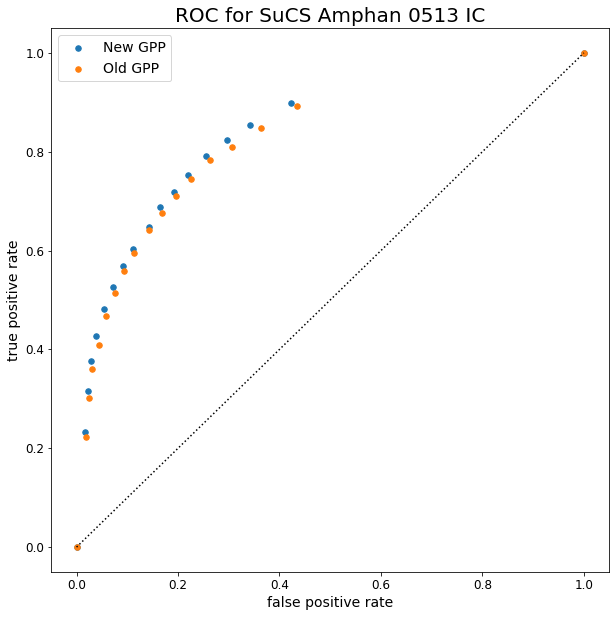

In [59]:
# ROC for probabilistic forecasts and bin_edges='continuous' default
roc1 = xs.roc(tc_igpp > 0.50, (x > 0.50).mean("member"), return_results='all_as_metric_dim')
roc2 = xs.roc(tc_kgpp > 0.50, (x1 > 0.50).mean("member"), return_results='all_as_metric_dim')
roc1 = xs.roc(tc_igpp > 0.50, (ix > 0.50).mean("member"), return_results='all_as_metric_dim')
roc2 = xs.roc(tc_kgpp > 0.50, (ix1 > 0.50).mean("member"), return_results='all_as_metric_dim')
fig=plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k:')
roc1.to_dataset(dim='metric').plot.scatter(s=30, y='true positive rate', x='false positive rate',label="New GPP 0513 IC")
a1=roc1.sel(metric='area under curve').values[0]
roc2.to_dataset(dim='metric').plot.scatter(s=30, y='true positive rate', x='false positive rate', label="Old GPP 0513 IC")
a2=roc2.sel(metric='area under curve').values[0]
roc3.to_dataset(dim='metric').plot.scatter(s=30, y='true positive rate', x='false positive rate', label="Old GPP 0506 IC")
a2=roc3.sel(metric='area under curve').values[0]
roc4.to_dataset(dim='metric').plot.scatter(s=30, y='true positive rate', x='false positive rate', label="Old GPP 0506 IC")
a2=roc4.sel(metric='area under curve').values[0]
plt.title('ROC for SuCS Amphan',fontsize=20)
plt.legend(loc='upper left',fontsize=14)
fig.savefig('ROC_amphan.jpg')

In [61]:
a1

0.839397279851125

In [62]:
a2

0.8296142636034884

In [19]:
# make weights as cosine of the latitude and broadcast
weights = np.cos(np.deg2rad(tc_igpp.lat))
_, weights = xr.broadcast(tc_igpp, weights)

# Remove the time dimension from weights
weights = weights.isel(time=0)

<xarray.DataArray (time: 8)>
array([ 0.66957482,  0.60640301,  0.64863446,  0.64137306,  0.5801525 ,
        0.21785243,  0.00078281, -0.01621162])
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 2020-05-15 ... 2020-05-21


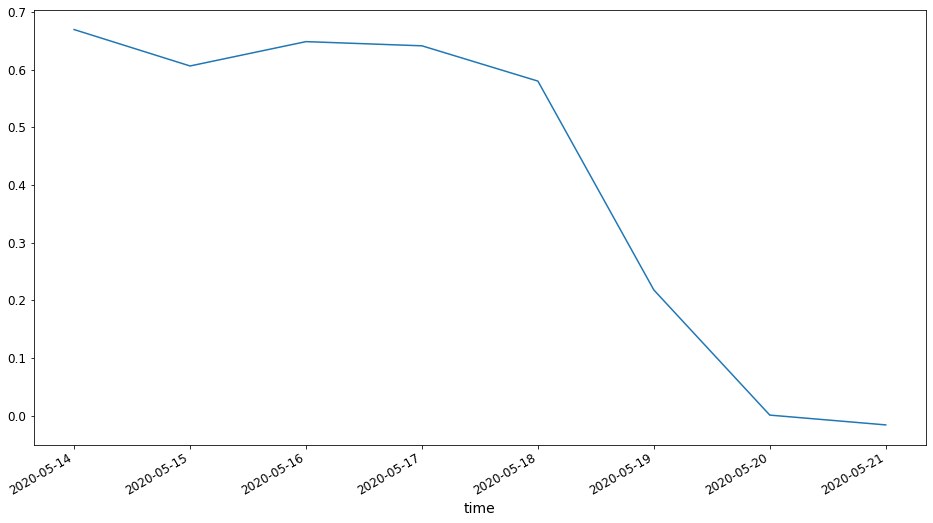

In [104]:
r_weighted = xs.pearson_r(tc_igpp, igpp_ic1ens, dim=["lat", "lon"], weights=weights)
print(r_weighted)
r_weighted.plot()

<xarray.DataArray (time: 8)>
array([0.47156338, 0.51515309, 0.63578742, 0.63374395, 0.44210405,
       0.18958914, 0.00745853, 0.0006697 ])
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 2020-05-15 ... 2020-05-21


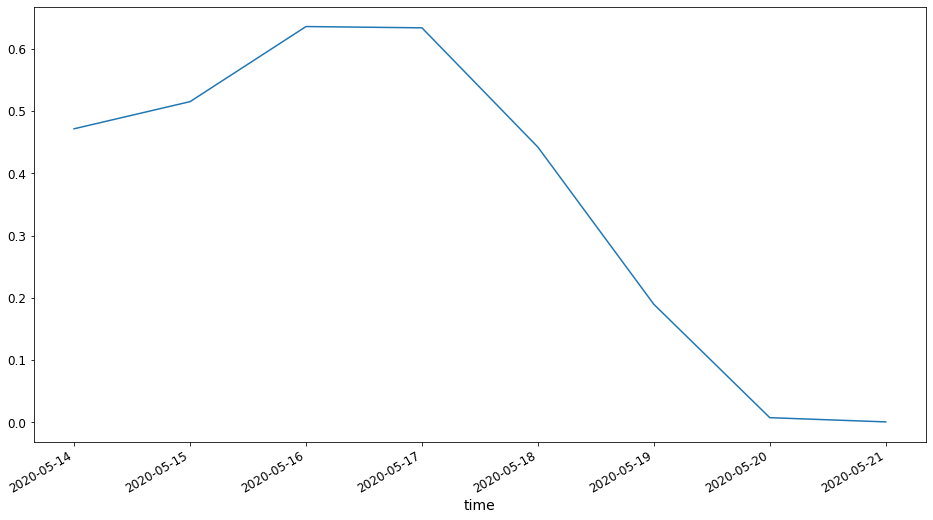

In [105]:
r_weightedk = xs.pearson_r(tc_kgpp, kgpp_ic1ens, dim=["lat", "lon"], weights=weights)
print(r_weightedk)

r_weightedk.plot()

In [ ]:
r_weightedk = xs.pearson_r(tc_kgpp, kgpp_nearic, dim=["lat", "lon"], weights=weights)
print(r_weightedk)

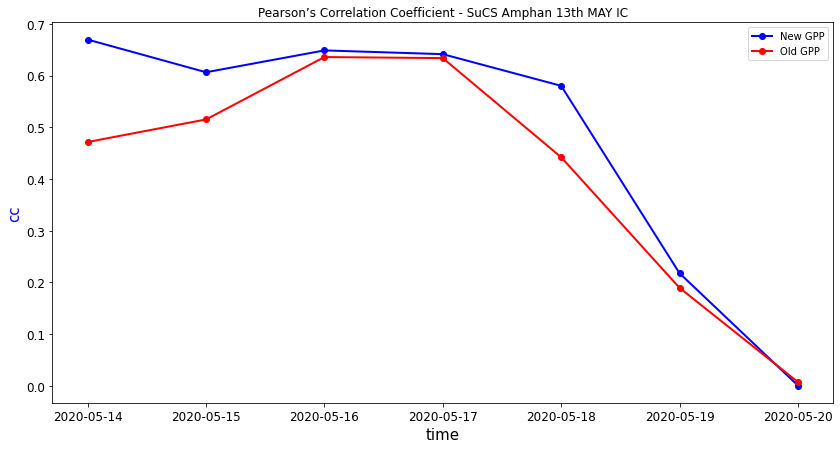

In [106]:
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[14, 7])
x=r_weighted.time[0:7]
y=r_weighted.values[0:7]
z=r_weightedk.values[0:7]

ax.plot(x, y,label='New GPP',color='b', linewidth=2, marker='o')
ax.plot(x, z, label='Old GPP',color='r', linewidth=2, marker='o' )
ax.set_xlabel('time', fontsize=15)
ax.set_ylabel('cc',  color='blue', fontsize=15)
ax.set_title('Pearson’s Correlation Coefficient - SuCS Amphan 13th MAY IC')
ax.legend()
plt.show()
fig.savefig('13maypcc.jpg')

<xarray.DataArray (time: 8)>
array([0.6713478 , 0.39377726, 0.12910467, 0.1501363 , 0.12408997,
       0.09247362, 0.29186459, 0.31052214])
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 2020-05-15 ... 2020-05-21


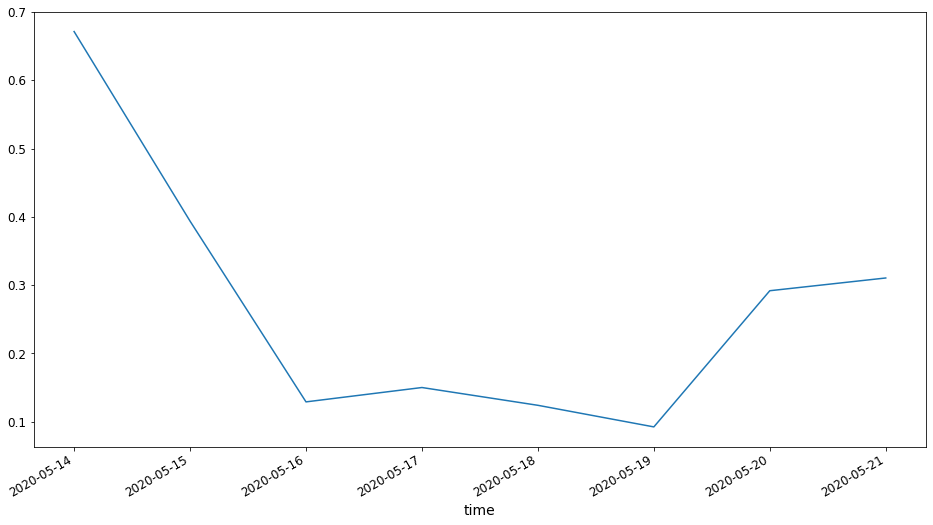

In [28]:
r_weighted = xs.pearson_r(tc_igpp, igpp_ic2ens, dim=["lat", "lon"], weights=weights)
print(r_weighted)

r_weighted.plot()

<xarray.DataArray (time: 8)>
array([0.6713478 , 0.39377726, 0.12910467, 0.1501363 , 0.12408997,
       0.09247362, 0.29186459, 0.31052214])
Coordinates:
  * time     (time) datetime64[ns] 2020-05-14 2020-05-15 ... 2020-05-21


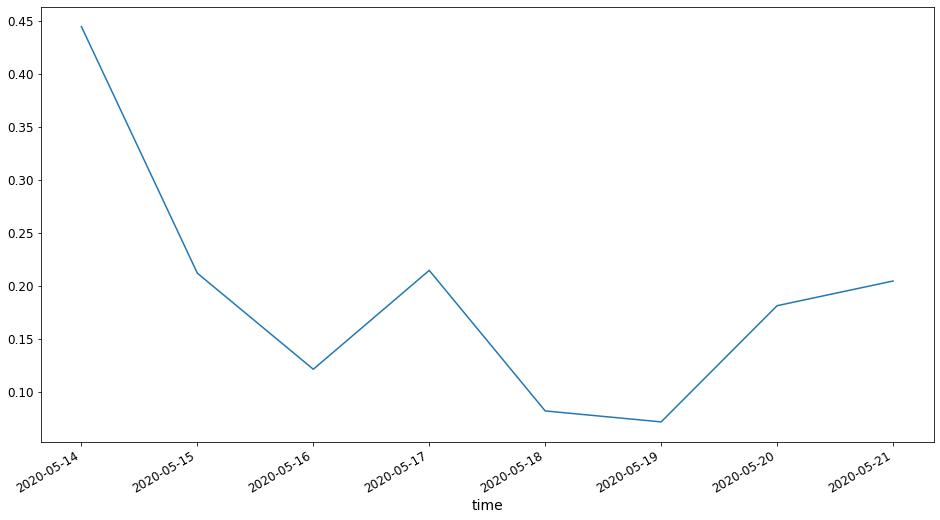

In [29]:
r_weightedk = xs.pearson_r(tc_kgpp, kgpp_ic2ens, dim=["lat", "lon"], weights=weights)
print(r_weighted)

r_weightedk.plot()
plt.savefig('13maypcc.png')

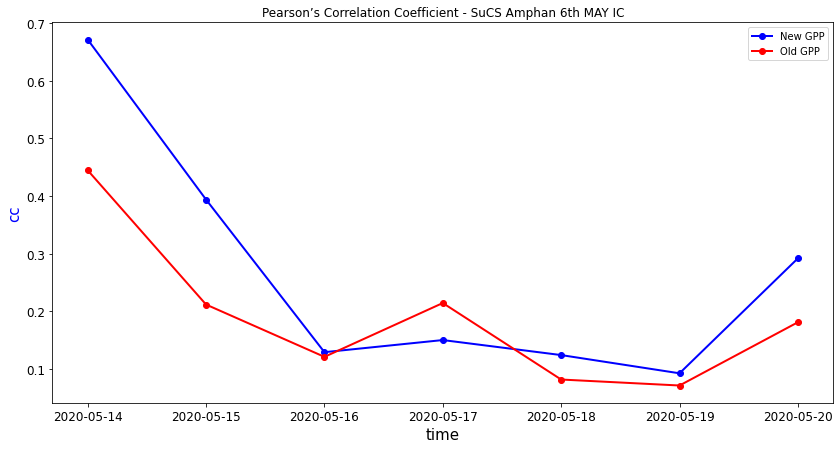

In [64]:
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[14, 7])
x=r_weighted.time[0:7]
y=r_weighted.values[0:7]
z=r_weightedk.values[0:7]

ax.plot(x, y,label='New GPP',color='b', linewidth=2, marker='o')
ax.plot(x, z, label='Old GPP',color='r', linewidth=2, marker='o' )
ax.set_xlabel('time', fontsize=15)
ax.set_ylabel('cc',  color='blue', fontsize=15)
ax.set_title('Pearson’s Correlation Coefficient - SuCS Amphan 6th MAY IC')
ax.legend()
plt.show()
fig.savefig('06maypcc.jpg')